In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/huge-stock-market-crash-2022/stock_market_crash_2022.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive

/content/drive/MyDrive


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from nltk.tokenize import word_tokenize
import nltk
import gensim
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [10]:
df=pd.read_csv('stock_market_crash_2022.csv')

In [11]:
df = df.dropna(subset=['hashtags']).drop_duplicates()

In [12]:
df = df[df['language'] == 'en']

In [13]:
df.head()

id                                               text  \
0  1538666561615015938      When will the #NYSE #stockmarketcrash happen?   
1  1538665013799489536  Aaj ka gyan:\n\nIf a company isn't a quality c...   
2  1538660868027830274  The stock market needs to crash hard to make i...   
3  1538657239849836544  Those who are "Buying on DIP" will very soon b...   
4  1538654339044196358  @rdrhwke I wish our so-called President were t...   

  text_sentiment         username  \
0        Neutral        tradexlnc   
1       Negative      niftymonday   
2       Negative       kyle132313   
3        Neutral  ChintanRajput16   
4       Positive      DrPCJustice   

                                            hashtags  \
0                       ['NYSE', 'stockmarketcrash']   
1  ['stockmarkets', 'stockmarketcrash', 'trading'...   
2     ['stockmarketcrash', 'economy', 'rich', 'Fed']   
3  ['stockmarketcrash', 'StocksToBuy', 'stockstow...   
4  ['Bidenomics', 'inflation', 'recession', 'stoc...   

                  created_at  user followers count  replycount  retweetcount  \
0  2022-06-19 23:34:29+00:00                 10669           0             0   
1  2022-06-19 23:28:20+00:00                   100           0             1   
2  2022-06-19 23:11:52+00:00                     0           0             0   
3  2022-06-19 22:57:27+00:00                    54           0             2   
4  2022-06-19 22:45:55+00:00                    28           0             0   

   likecount  quotecount language  media  retweetedTweet  quotedtweet  \
0          1           0       en    NaN             NaN          NaN   
1          8           0       en    NaN             NaN          NaN   
2          0           0       en    NaN             NaN          NaN   
3          2           0       en    NaN             NaN          NaN   
4          0           0       en    NaN             NaN          NaN   

   inReplyToTweetId                inReplyToUser  \
0               NaN                          NaN   
1               NaN                          NaN   
2               NaN                          NaN   
3               NaN                          NaN   
4      1.538653e+18  https://twitter.com/rdrhwke   

                                      mentionedUsers  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  [User(username='rdrhwke', id=43753976, display...

In [79]:
# Clean text function
def clean_text(text,join=False):
    text = BeautifulSoup(text,'html.parser').get_text()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#(\w+)', r'\1', text)   # Remove hashtags (or keep hashtags but remove '#' symbol)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if len(word) > 2]  # Remove tokens with less than 3 letters
    tokens = [word.lower() for word in tokens]  # Lowercase all tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    if join:
      return ' '.join(tokens)
    return tokens


In [82]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()


def process_text(text):

    # Tokenize and clean the document
    tokens = clean_text(text)
    # Lemmatize the tokens if they are in the reduced vocabulary
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens if word in reduced_vocab]
    # Combine tokens back into a string
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
corpus = [''.join(clean_text(doc)) for doc in df['text']]

In [50]:
corpus_str=' '.join(corpus)

In [53]:
corpus_str

'nyse stockmarketcrash happen aaj gyan company isnt quality company dont buy price low bargainbin companies often produce bargainbin results stockmarkets stockmarketcrash trading investing nifty banknifty stock market needs crash hard make realistic cant keep printing money keep blowing bubble gon pop one way another smh sell people greedy buy people fearful stockmarketcrash economy rich fed buying dip soon become promoters company stockmarketcrash stockstobuy stockstowatch wish socalled president transitory mean really shortterm transitory sayin bidenomics inflation recession stockmarketcrash paul wrote stockmarketcrash predicted inflation war year president wrong must lol school economics stockmarketcrash best explanation damn mask crash money printer brrrr beer expensive fed sobers money shit margin calls must sell btc stagflation shit show huh btc hedge china new money dayum usa lagging shit sherlock much btc like btc buy stockmarketcrash best explanation damn mask crash money prin

In [54]:
unique_tokens = set(word_tokenize(corpus_str))


In [55]:
len(unique_tokens)

28135

# There are 28135 unique tokens, I guess it might represent a lof of noise.So we need to recude it.Let's say we delete tokens that appear less than 3 times

In [56]:

token_counts = Counter(word_tokenize(corpus_str))

reduced_vocab = [token for token, count in token_counts.items() if count >= 3]

In [58]:
len(reduced_vocab)

9282

In [64]:
reduced_vocab[:5]

['nyse', 'stockmarketcrash', 'happen', 'aaj', 'gyan']

In [84]:
from collections import Counter
# preparation for sentimental analysis
SA_data = df[['text','text_sentiment']]



SA_data['text_preprocessed'] = SA_data['text'].apply(process_text)
SA_data['text_sentiment'] = SA_data['text_sentiment'].map({'Positive':2,'Neutral':1,'Negative':0})
SA_data.head()

text  text_sentiment  \
0      When will the #NYSE #stockmarketcrash happen?               1   
1  Aaj ka gyan:\n\nIf a company isn't a quality c...               0   
2  The stock market needs to crash hard to make i...               0   
3  Those who are "Buying on DIP" will very soon b...               1   
4  @rdrhwke I wish our so-called President were t...               2   

                                   text_preprocessed  
0                       nyse stockmarketcrash happen  
1  aaj gyan company isnt quality company dont buy...  
2  stock market need crash hard make realistic ca...  
3  buying dip soon become promoter company stockm...  
4  wish socalled president transitory mean really...

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA,TruncatedSVD
# get split
list_corpus = SA_data['text'].tolist()
list_labels = SA_data['text_sentiment'].tolist()

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    data = tfidf_vectorizer.fit_transform(data)
    return data

# get train and test set
data_tfidf = tfidf(list_corpus)

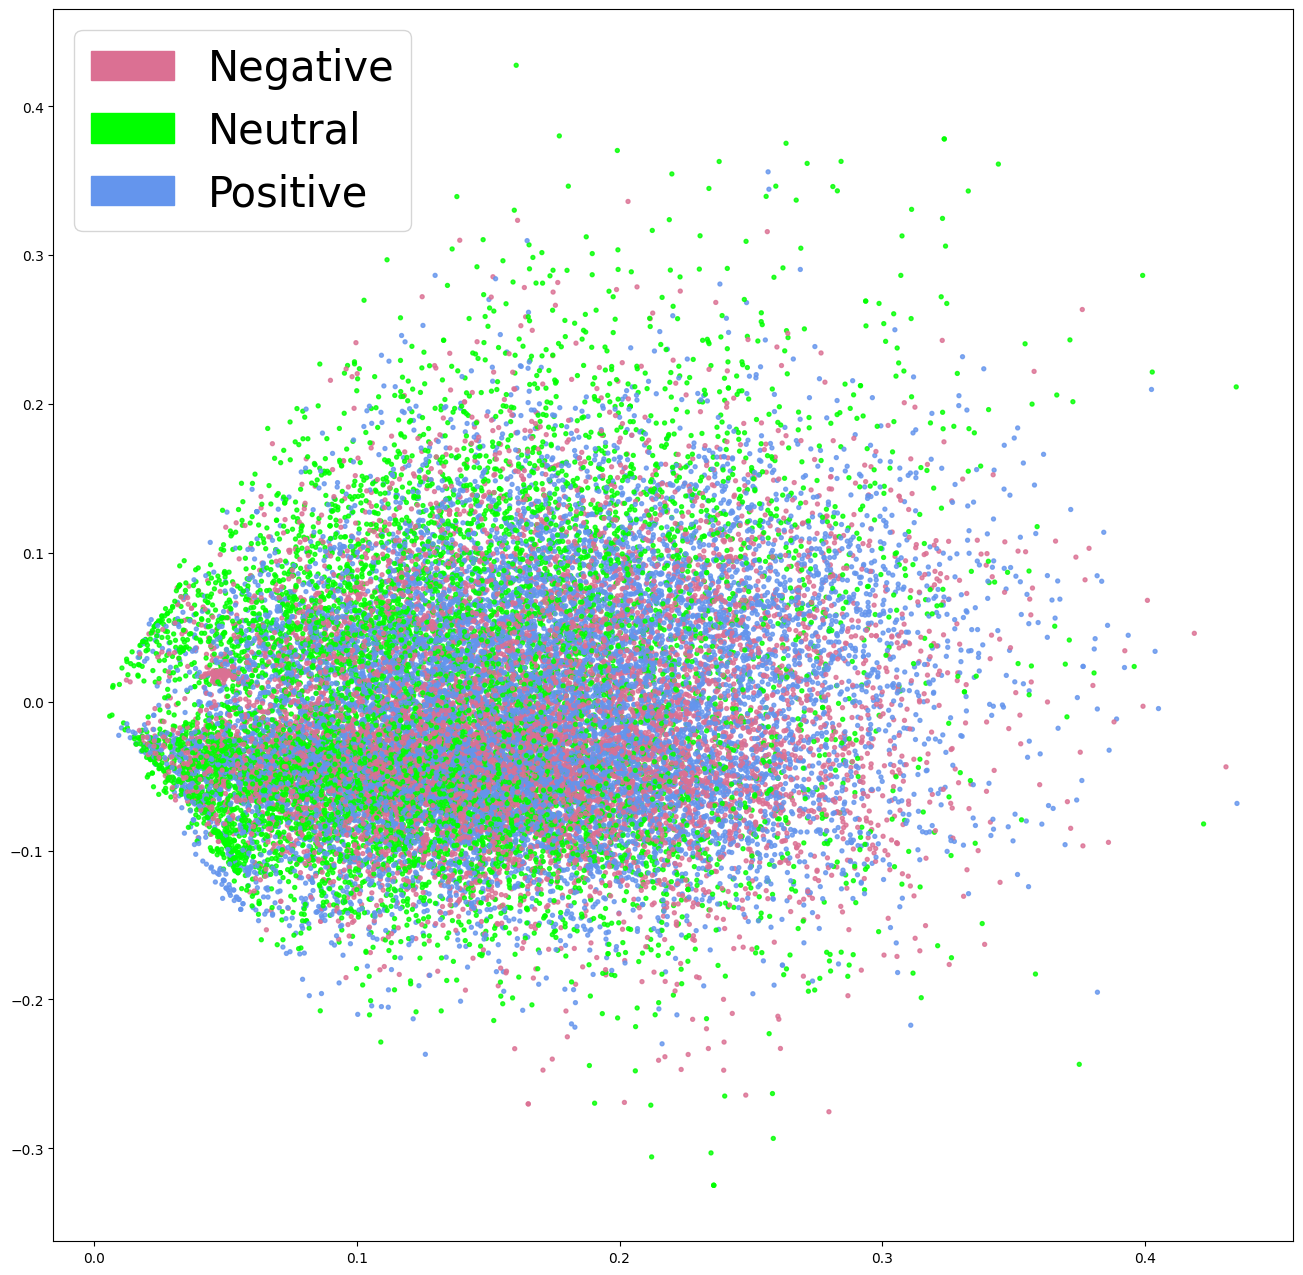

In [86]:
# Dimension Reduction & Plot
from sklearn.decomposition import TruncatedSVD

def plot_LSA(data, labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa_scores = lsa.fit_transform(data)  # Use the TF-IDF data for dimensionality reduction
    color_mapper = {label: idx for idx, label in enumerate(set(labels))}
    color_column = [color_mapper[label] for label in labels]
    colors = ['#DB7093', '#00FF00', '#6495ED']
    if plot:
        plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=0.8, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
        pink_patch = mpatches.Patch(color='#DB7093', label='Negative')
        green_patch = mpatches.Patch(color='#00FF00', label='Neutral')
        blue_patch = mpatches.Patch(color='#6495ED', label='Positive')
        plt.legend(handles=[pink_patch, green_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))
plot_LSA(data_tfidf, list_labels)
plt.show()


* Distribution: The distribution of sentiments seems to be fairly spread out across the plot, with a dense concentration of points towards the center. This could suggest a significant amount of mixed sentiment regarding the market crash.

* Dominant Sentiment: There seems to be a notable cluster of red points (negative sentiment), which is to be expected in the context of a market crash. However, there are also a considerable number of green (neutral) and blue (positive) points, indicating that not all the sentiment is negative.

* Outliers: There are a few points that stand apart from the main concentration of the data, especially in the negative and positive zones. These outliers could represent extreme sentiments or unusual opinions that diverge from the general consensus.


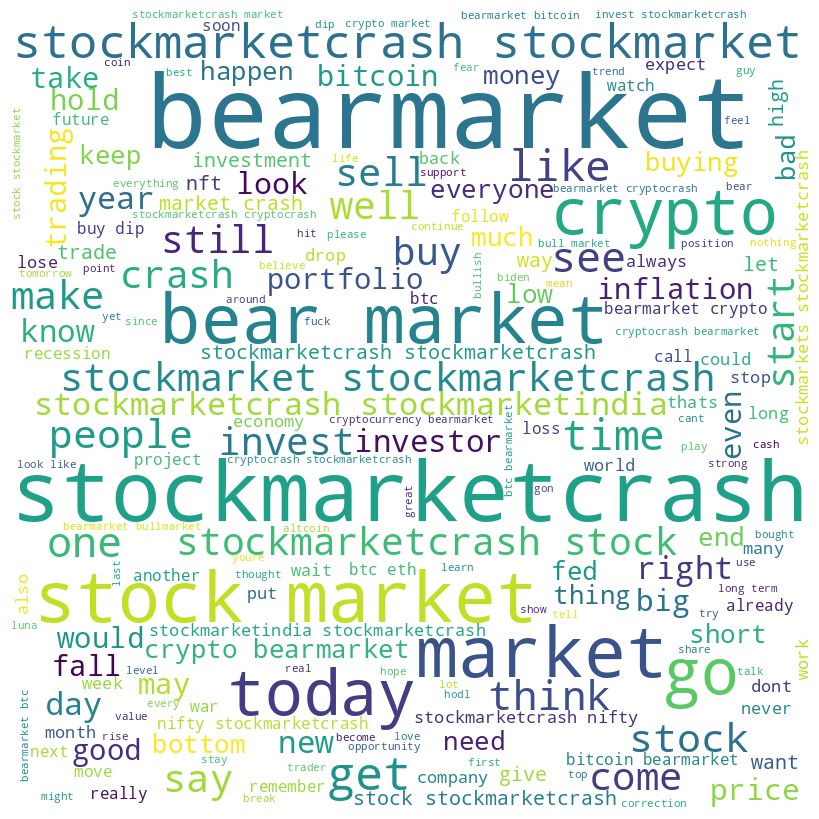

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
text = " ".join(tweet for tweet in SA_data.text_preprocessed)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stopwords.words('english')),
                min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Plot above represents words that have been used most of the time.



*   **Dominant Themes:** The words "stock market crash," "bear market," "sell," "buy," "portfolio," and "investor" are prominently displayed, suggesting these are key themes or frequently mentioned concepts in the data.
*   **Sentiments Expressed:** The word cloud suggests a mix of sentiments, with words like "crash," "bear," and "fall" indicating negative sentiment, while words like "buy," "portfolio," and "investment" could be part of discussions on managing the situation or looking for opportunities.
* **Market Jargon and Keywords: **The presence of words like "crypto," "bitcoin," "inflation," and "fed" suggest that discussions around the market crash also involve topics related to cryptocurrency, economic conditions, and possibly the Federal Reserve's policies.
* **Time Sensitivity:** The word "today" suggests immediacy or recent discussions. This might indicate that the texts are timely reactions to market events.

* Words like "sell," "buy," "hold," and "portfolio" indicate the different actions that investors might be considering or discussing in response to the market conditions.

* **Public Sentiment:** The use of casual or colloquial language (e.g., expletives or informal slang) could indicate the data includes public sentiments from social media or forums where individuals express their opinions freely.

* **Potential for Misleading Interpretations:** Word clouds do not provide context or the ability to understand the sentiment behind the use of the words. For example, "buy" and "sell" are opposite actions but without context, we can't know the sentiment or the advice being implied.

* **Market Analysis and Strategy:** Words like "think," "strategy," "long term," and "short" suggest that the texts may include analysis and strategic discussions on how to navigate the market crash.